# R-Initialization

### R-Package Download

In [18]:
library(ggplot2) # For Plot Visualizations
library(car) # For Variance Inflation Factor function -- vif()
library(corrplot) # For Correlation Visualizations
library(data.table) # For Complex Data Frame Joins

### Plot Configuration

In [402]:
options(repr.plot.width = 6, repr.plot.height = 6) # Size of plots
alpha = 0.25 # Opacity of points on plots
size = 0.3 # Size of points on plots

# Data Initialization

### Data Download

In [268]:
# Downloading Vaccination Data
vaccinations = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv")))

# Downloading Testing Data
testing = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv")))

# Downloading Hospitalization Data
hospitalization = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/hospitalizations/covid-hospitalizations.csv")))

# Downloading Hospitalization Data
deaths = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_deaths_per_million.csv")))
# deaths = read.csv(url(paste0("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/full_data.csv")))



In [269]:
head(vaccinations)
head(testing)
head(hospitalization)
head(deaths)

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,NA,0,0,NA,NA,NA,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,33,1367,0.003


Entity,ISO.code,Date,Source.URL,Source.label,Notes,Cumulative.total,Daily.change.in.cumulative.total,Cumulative.total.per.thousand,Daily.change.in.cumulative.total.per.thousand,X7.day.smoothed.daily.change,X7.day.smoothed.daily.change.per.thousand,Short.term.positive.rate,Short.term.tests.per.case
Afghanistan - tests performed,AFG,2022-01-29,http://www.emro.who.int/images/stories/coronavirus/covid-sitrep-28.pdf,WHO Regional Office for the Eastern Mediterranean,,853003,NA,21.272,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-01-30,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-01-31,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-02-01,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-02-02,,,,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan - tests performed,AFG,2022-02-03,,,,NA,NA,NA,NA,NA,NA,NA,NA


entity,iso_code,date,indicator,value
Algeria,DZA,2020-07-17,Daily ICU occupancy,62.000
Algeria,DZA,2020-07-17,Daily ICU occupancy per million,1.381
Algeria,DZA,2020-07-18,Daily ICU occupancy,67.000
Algeria,DZA,2020-07-18,Daily ICU occupancy per million,1.492
Algeria,DZA,2020-07-20,Daily ICU occupancy,64.000
Algeria,DZA,2020-07-20,Daily ICU occupancy per million,1.425


date,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua.and.Barbuda,...,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis.and.Futuna,Yemen,Zambia,Zimbabwe
2020-01-22,0.000,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-01-23,0.000,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-01-24,0.001,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-01-25,0.002,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-01-26,0.002,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-01-27,0.003,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Data Cleanup

In [273]:
# Restructure testing
testing <- transform(testing,location=sub(" .*", "", Entity)) # Creates location column, using regex on Entity column
colnames(testing)[colnames(testing)=="Date"]="date" # Renames Date column to date

In [280]:
# Restructure hospitalization
colnames(hospitalization)[colnames(hospitalization)=="entity"]="location" # Renames Date column to date
hospitalization = hospitalization[hospitalization[,4]=="Daily ICU occupancy",]
colnames(hospitalization)[colnames(hospitalization)=="value"]="icu_daily" # Renames value column to icu_daily

In [281]:
# Restructure deaths !!! NOTE: ONLY RUN ONCE PER DATA DOWNLOAD !!!
countries = colnames(deaths[-1]) # List of countries in deaths
dates = deaths[1] # List of dates in deaths
n_countries = length(countries) # Number of countries
n_dates = length(dates[,1]) # Number of dates

q = data.frame(date=rep(dates[,1],n_countries), # Sets date column equal to vector of dates in sequential order, repeating n_countries times
                location=rep(countries,each=n_dates), # Sets location column to list of countries, each repeated n_dates times
                deaths_per_mil=rep(NA,n_dates*n_countries)) # Sets NA for deaths_per_mil column

for (i in 1:n_countries) { # Loop for each unique country
    for (j in 1:n_dates) { # Loop for each unique date
        q$deaths_per_mil[(i-1)*n_dates+j] = deaths[j,i+1] # Sets the NA value in deaths_per_mil at row
        # (Current Country # - 1) * n_dates + Current Date # = deaths[Current Date #, Current Country # + Table Offset]
    }
}

deaths = q # Changes deaths data table to the reformatted data frame for further processing

In [282]:
head(testing)
head(hospitalization)
head(deaths)
# hospitalization

Entity,ISO.code,date,Source.URL,Source.label,Notes,Cumulative.total,Daily.change.in.cumulative.total,Cumulative.total.per.thousand,Daily.change.in.cumulative.total.per.thousand,X7.day.smoothed.daily.change,X7.day.smoothed.daily.change.per.thousand,Short.term.positive.rate,Short.term.tests.per.case,location
Afghanistan - tests performed,AFG,2022-01-29,http://www.emro.who.int/images/stories/coronavirus/covid-sitrep-28.pdf,WHO Regional Office for the Eastern Mediterranean,,853003,NA,21.272,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,2022-01-30,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,2022-01-31,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,2022-02-01,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,2022-02-02,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan
Afghanistan - tests performed,AFG,2022-02-03,,,,NA,NA,NA,NA,NA,NA,NA,NA,Afghanistan


,location,iso_code,date,indicator,icu_daily
1,Algeria,DZA,2020-07-17,Daily ICU occupancy,62
3,Algeria,DZA,2020-07-18,Daily ICU occupancy,67
5,Algeria,DZA,2020-07-20,Daily ICU occupancy,64
7,Algeria,DZA,2020-07-21,Daily ICU occupancy,56
9,Algeria,DZA,2020-07-22,Daily ICU occupancy,51
11,Algeria,DZA,2020-07-23,Daily ICU occupancy,66


date,location,deaths_per_mil
2020-01-22,World,0.000
2020-01-23,World,0.000
2020-01-24,World,0.001
2020-01-25,World,0.002
2020-01-26,World,0.002
2020-01-27,World,0.003


# Data Analyses

### Method 1:

We are looking purely at the deaths as a function of everything else. This being `Date`, `Location`, `Daily Testing`, `Daily ICU Occipancy`. We are looking at this as a density, to allow for better comparison between countries of different population magnitudes. We merge our data into a set:

In [376]:
data.method1 = merge(x=deaths,y=vaccinations,by=c("location","date")) # Merges deaths & vaccinations data on Location and Date
data.method1 = merge(x=data.method1,y=testing,by=c("location","date")) # Merges testing data on Location and Date
data.method1 = merge(x=data.method1,y=hospitalization,by=c("location","date")) # Merges hospitalization data on Location and Date

# Day 1 = 2020-01-22

colnames(data.method1)
data.method1 <- data.frame(days_since_start=as.numeric(data.method1$date),location=data.method1$location,
                           deaths_daily_per_mil=data.method1$deaths_per_mil,tests_daily_per_thd=data.method1$Daily.change.in.cumulative.total.per.thousand,
                           icu_daily=data.method1$icu_daily,vax_daily_per_mil=data.method1$daily_vaccinations_per_million)

data.method1 = na.omit(data.method1)
# data.method1$date = as.numeric(data.method1$date)
data.method1

[1] "location"                                     
 [2] "date"                                         
 [3] "deaths_per_mil"                               
 [4] "iso_code.x"                                   
 [5] "total_vaccinations"                           
 [6] "people_vaccinated"                            
 [7] "people_fully_vaccinated"                      
 [8] "total_boosters"                               
 [9] "daily_vaccinations_raw"                       
[10] "daily_vaccinations"                           
[11] "total_vaccinations_per_hundred"               
[12] "people_vaccinated_per_hundred"                
[13] "people_fully_vaccinated_per_hundred"          
[14] "total_boosters_per_hundred"                   
[15] "daily_vaccinations_per_million"               
[16] "daily_people_vaccinated"                      
[17] "daily_people_vaccinated_per_hundred"          
[18] "Entity"                                       
[19] "ISO.code"                                     
[20] "Source.URL"                                   
[21] "Source.label"                                 
[22] "Notes"                                        
[23] "Cumulative.total"                             
[24] "Daily.change.in.cumulative.total"             
[25] "Cumulative.total.per.thousand"                
[26] "Daily.change.in.cumulative.total.per.thousand"
[27] "X7.day.smoothed.daily.change"                 
[28] "X7.day.smoothed.daily.change.per.thousand"    
[29] "Short.term.positive.rate"                     
[30] "Short.term.tests.per.case"                    
[31] "iso_code.y"                                   
[32] "indicator"                                    
[33] "icu_daily"

,days_since_start,location,deaths_daily_per_mil,tests_daily_per_thd,icu_daily,vax_daily_per_mil
3,344,Argentina,3.186,1.149,3440,442
4,347,Argentina,1.230,0.663,3438,145
5,348,Argentina,2.351,0.568,3433,118
6,349,Argentina,3.340,1.115,3502,136
7,350,Argentina,3.318,1.200,3460,151
8,351,Argentina,4.197,1.240,3460,119
9,352,Argentina,3.208,1.194,3559,168
10,353,Argentina,3.318,1.209,3559,255
11,354,Argentina,3.164,0.979,3597,277
12,355,Argentina,1.714,0.592,3612,279


In [377]:
# sum[data.method1$location == "Australia"]
counts = c("Australia","Austria","Belgium","Bolivia","Bulgaria","Canada","Chile","Cyprus","Czechia","Denmark",
            "Estonia","Finland","France","Ireland","Israel","Italy","Japan","Latvia","Luxembourg","Malaysia",
            "Malta","Netherlands","Portugal","Serbia","Slovakia","Slovenia","Spain","Sweden","Switzerland")

for (co in counts) {
    print(co)
    print(sum(data.method1$location == co))
}
# sum(data.method1$location == "Australia")

[1] "Australia"
[1] 482
[1] "Austria"
[1] 527
[1] "Belgium"
[1] 538
[1] "Bolivia"
[1] 406
[1] "Bulgaria"
[1] 27
[1] "Canada"
[1] 537
[1] "Chile"
[1] 543
[1] "Cyprus"
[1] 463
[1] "Czechia"
[1] 537
[1] "Denmark"
[1] 550
[1] "Estonia"
[1] 75
[1] "Finland"
[1] 467
[1] "France"
[1] 538
[1] "Ireland"
[1] 76
[1] "Israel"
[1] 544
[1] "Italy"
[1] 542
[1] "Japan"
[1] 70
[1] "Latvia"
[1] 76
[1] "Luxembourg"
[1] 540
[1] "Malaysia"
[1] 480
[1] "Malta"
[1] 74
[1] "Netherlands"
[1] 503
[1] "Portugal"
[1] 448
[1] "Serbia"
[1] 530
[1] "Slovakia"
[1] 535
[1] "Slovenia"
[1] 542
[1] "Spain"
[1] 527
[1] "Sweden"
[1] 530
[1] "Switzerland"
[1] 530


In [388]:
lm_method1 = lm(data=data.method1, deaths_daily_per_mil~.)
df.diagnostics.method1 = data.frame(yhat = fitted(lm_method1), r = resid(lm_method1),
                                    y = data.method1$deaths_daily_per_mil)
summary(lm_method1)


Call:
lm(formula = deaths_daily_per_mil ~ ., data = data.method1)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.025  -1.472  -0.552   0.833  52.943 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.875e-01  2.486e-01   1.559    0.119    
days_since_start    -2.834e-03  1.932e-04 -14.670  < 2e-16 ***
locationAustralia    2.255e+00  2.284e-01   9.873  < 2e-16 ***
locationAustria      1.951e+00  2.436e-01   8.011 1.24e-15 ***
locationBelgium      2.999e+00  2.196e-01  13.658  < 2e-16 ***
locationBolivia      3.434e+00  2.355e-01  14.582  < 2e-16 ***
locationBulgaria     3.503e+00  6.029e-01   5.811 6.37e-09 ***
locationCanada       1.882e+00  2.139e-01   8.798  < 2e-16 ***
locationChile        2.354e+00  2.019e-01  11.658  < 2e-16 ***
locationCyprus       3.865e-01  2.904e-01   1.331    0.183    
locationCzechia      5.587e+00  2.183e-01  25.589  < 2e-16 ***
locationDenmark      2.602e+00  2.305e-01  11.288  < 2e-16 ***
locat

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


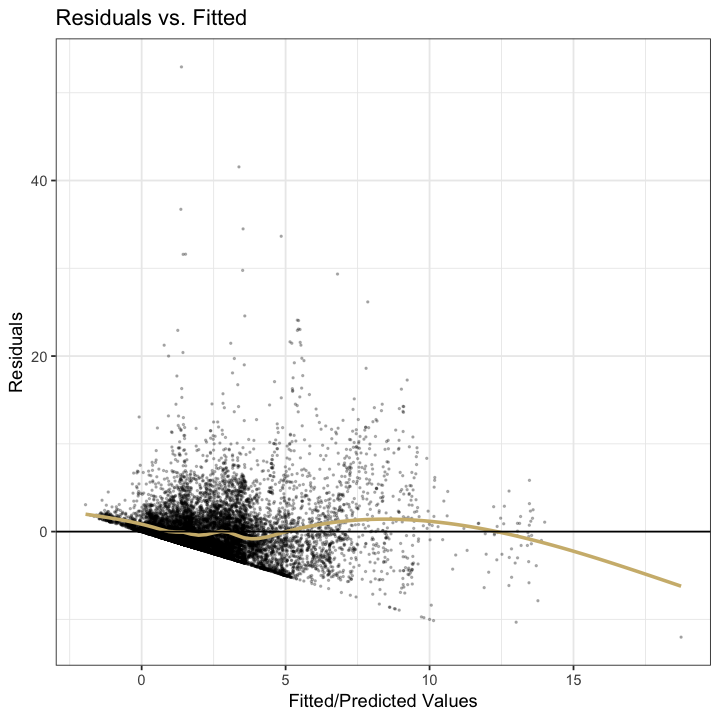

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


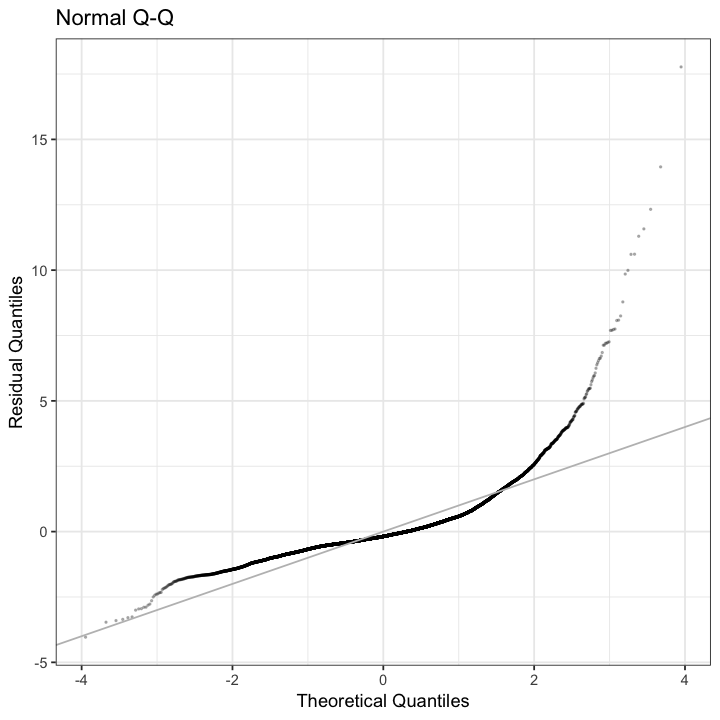

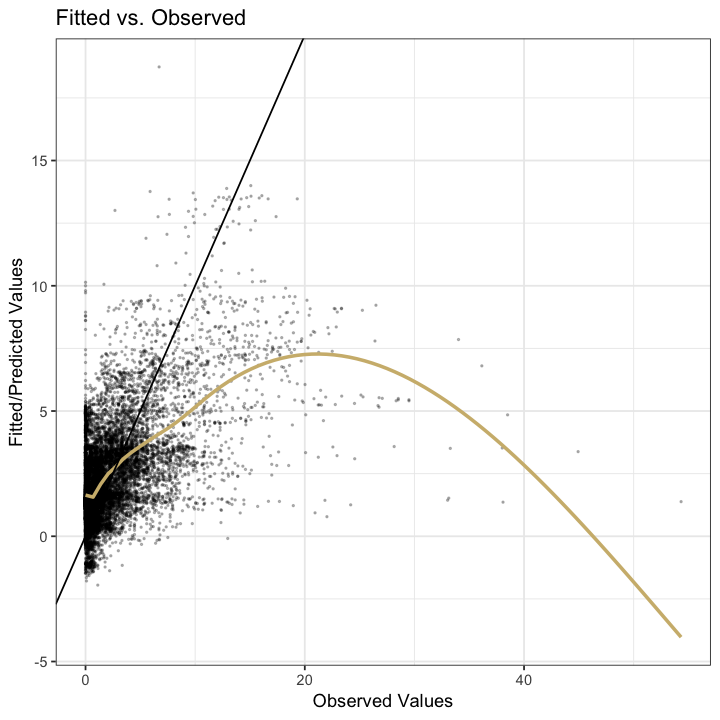

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


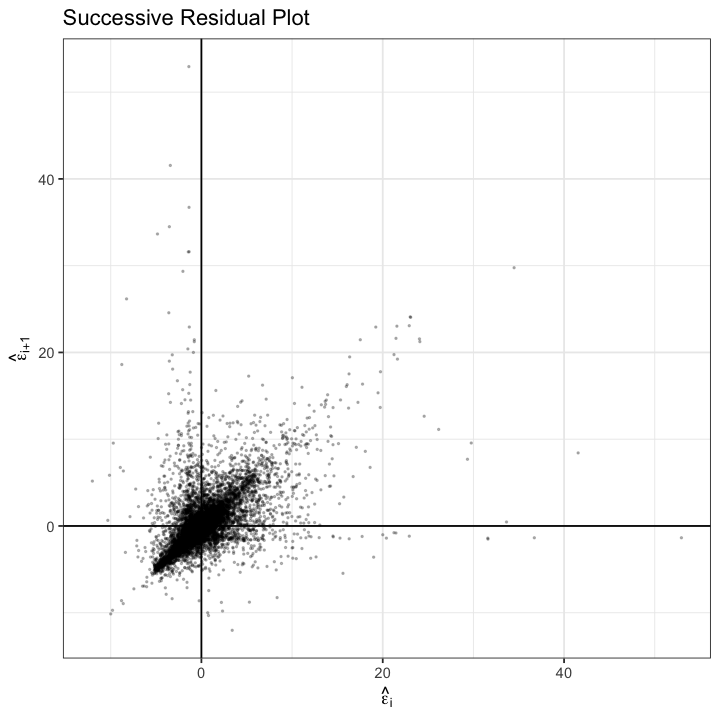

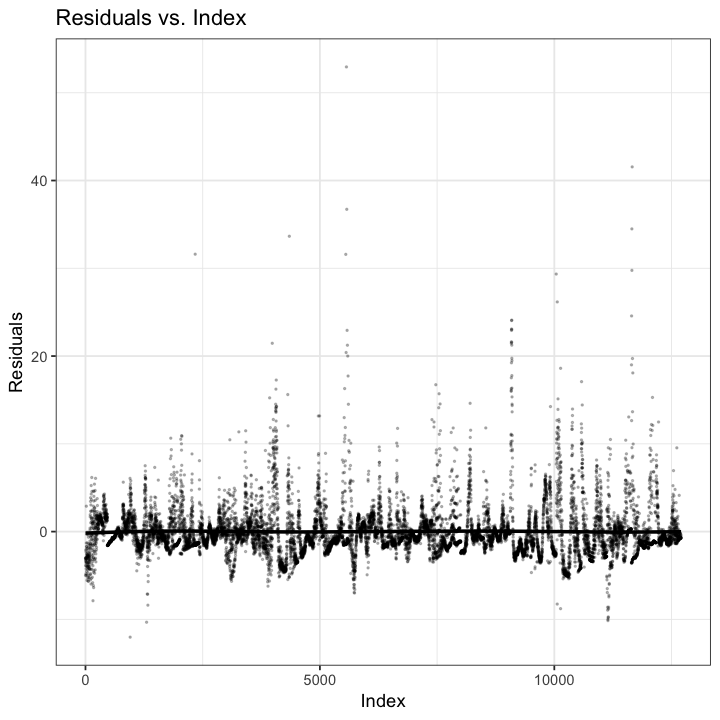

In [405]:
# Residuals vs. Fitted Plot
ggplot(data=df.diagnostics.method1,aes(x=yhat,y=r)) + geom_point(alpha=alpha,size=size) +
    geom_smooth(se=F,col="#CFB87C") + geom_hline(yintercept=0) +
    ggtitle("Residuals vs. Fitted") + xlab("Fitted/Predicted Values") + ylab("Residuals") + theme_bw()

# Normal Q-Q Plot
ggplot(data=df.diagnostics.method1,aes(sample=(r-mean(r))/sd(r))) + stat_qq(alpha=alpha,size=size) + 
    geom_abline(slope=1,intercept=0,col="grey") +
    ggtitle("Normal Q-Q") + xlab("Theoretical Quantiles") + ylab("Residual Quantiles") + theme_bw()

# Fitted vs. Observed Plot
ggplot(data=df.diagnostics.method1,aes(x=y,y=yhat)) + geom_point(alpha=alpha,size=size) +
    geom_smooth(se=F,col="#CFB87C") + geom_abline(intercept=0,slope=1) +
    ggtitle("Fitted vs. Observed") + xlab("Observed Values") + ylab("Fitted/Predicted Values") + theme_bw()

# Successive Residuals Plot
e_i = head(df.diagnostics.method1$r,dim(data.method1)[1]-1)
e_j = tail(df.diagnostics.method1$r,dim(data.method1)[1]-1)
ggplot(data.frame(e_i,e_j),aes(x=e_i,y=e_j)) + geom_point(alpha=alpha,size=size) + 
    geom_vline(xintercept = 0) + geom_hline(yintercept = 0) + 
    ggtitle("Successive Residual Plot") + xlab(expression(hat(epsilon)[i])) + ylab(expression(hat(epsilon)[i+1])) + theme_bw()

# Residuals vs. Index Plot
ggplot(df.diagnostics.method1,aes(x=1:dim(data.method1)[1],y=r)) + 
    geom_point(alpha=alpha,size=size) + geom_smooth(se = F, col = "black") +
    ggtitle("Residuals vs. Index") + xlab("Index") + ylab("Residuals") + theme_bw()

,GVIF,Df,GVIF^(1/(2*Df))
days_since_start,1.227134,1,1.107761
location,7.269337,29,1.034793
tests_daily_per_thd,2.713537,1,1.647282
icu_daily,2.702360,1,1.643886
vax_daily_per_mil,1.165198,1,1.079443


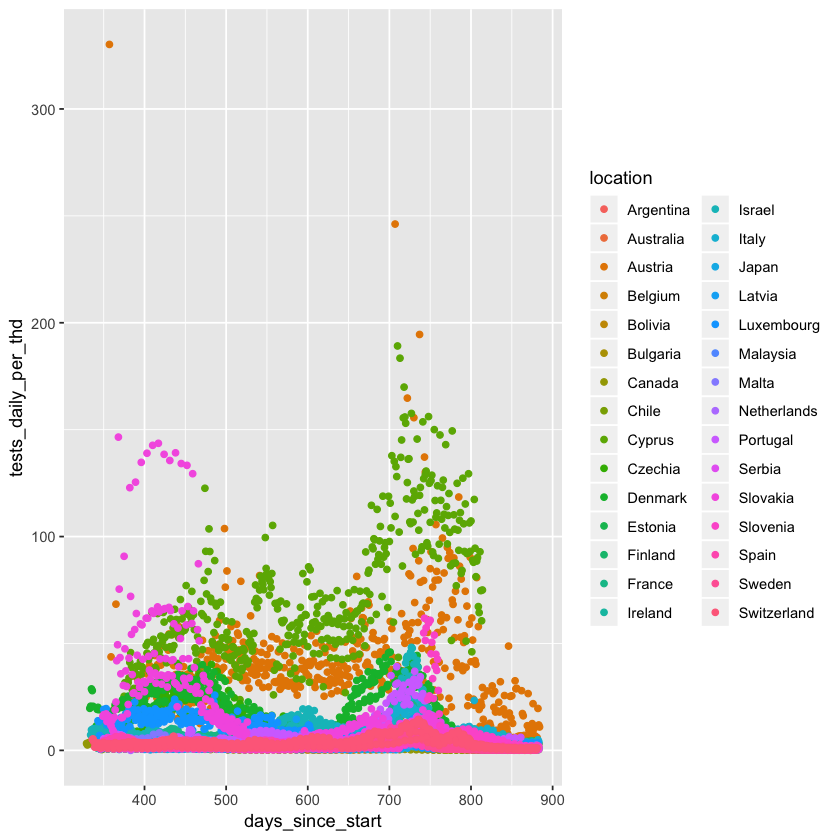

In [387]:
# plot(x=data.method1$days_since_start,y=data.method1$deaths_daily_per_mil)
# ggplot(data=data.method1,aes(x=days_since_start,y=deaths_daily_per_mil,color=location)) + geom_point()
ggplot(data=data.method1,aes(x=days_since_start,y=tests_daily_per_thd,color=location)) + geom_point()
vif(lm_method1)

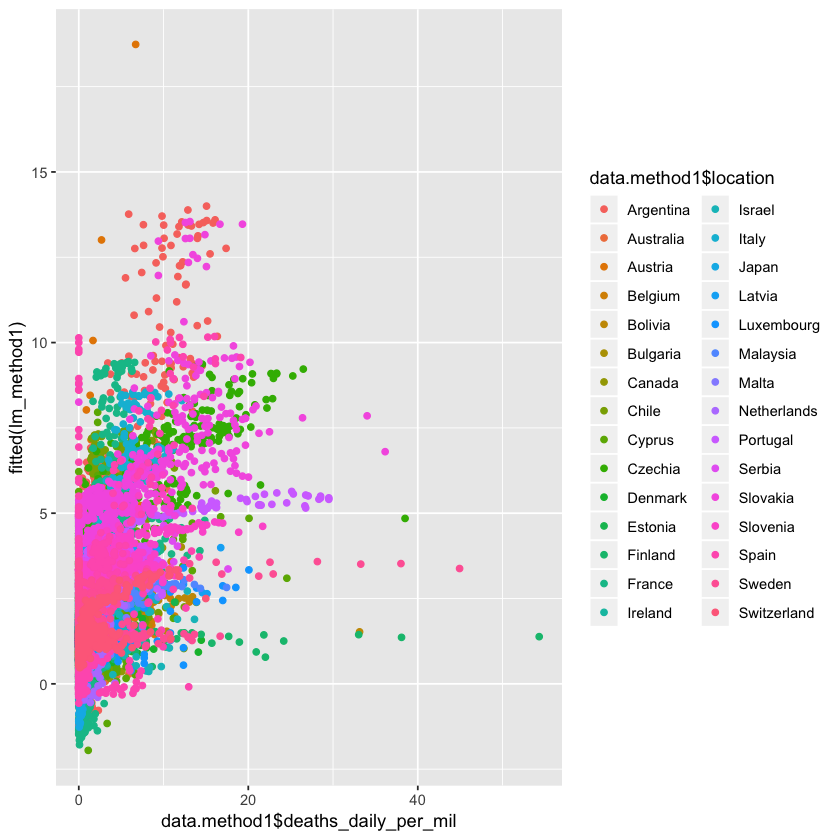

In [381]:
ggplot(data=data.method1,aes(x=data.method1$deaths_daily_per_mil,y=fitted(lm_method1),color=data.method1$location)) + geom_point()
# length(fitted(lm_method1))
# length(data.method1$deaths_daily_per_mil)